In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset_train=pd.read_csv("Google_Stock_Price_Train.csv")
training_set=dataset_train.iloc[:,1:2].values

training_set



array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train), np.array(y_train)



TypeError: 'tuple' object is not callable

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

print(x_train.shape)


(1198, 60, 1)


In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#initializare
regressor=Sequential()
#first lstm layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#second lstm layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#third lstm layer

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#fourth lstm layer


regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))


#output layer

regressor.add(Dense(units=1))





c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
#compile
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 0.0717
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0069
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0062
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0050
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0056
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0045
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0055
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0052
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0042
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0039
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0047
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0041
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0043
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0036
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - l

In [20]:
dataset_test=pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price=dataset_test.iloc[:,1:2].values


In [21]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0 )#vertical
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)


In [23]:
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
   
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)





1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [24]:
print(predicted_stock_price)

[[785.0658 ]
 [782.52374]
 [782.1325 ]
 [782.8445 ]
 [785.4921 ]
 [790.68567]
 [796.1189 ]
 [799.3253 ]
 [800.7376 ]
 [801.078  ]
 [800.8829 ]
 [800.3775 ]
 [799.8463 ]
 [799.9344 ]
 [800.5549 ]
 [804.3316 ]
 [810.5324 ]
 [817.845  ]
 [822.9194 ]
 [821.20764]]


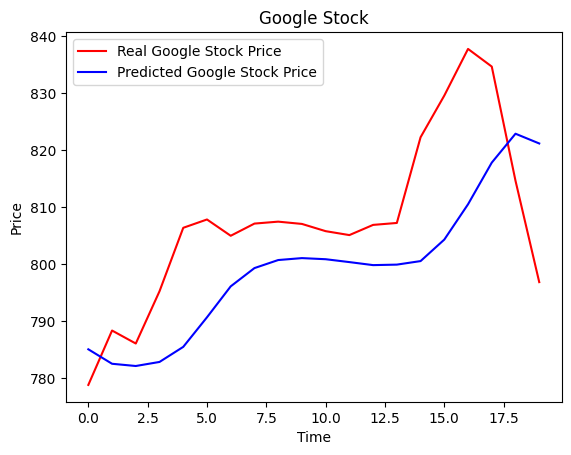

In [28]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title("Google Stock")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [31]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

print(rmse)

14.402265294602694
